In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib_inline.backend_inline as backend_inline
from torchsummary import summary

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###
# # Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [ ]:
# Create the Dataset
nPerClass = 1000  # Number of samples per class
imgSize = 91  # Image size (91x91)

x = np.linspace(-4, 4, imgSize)
# print("x.shape:", x.shape)
X, Y = np.meshgrid(x, x)
# print("X.shape:", X.shape, "Y.shape:", Y.shape)
# print(Y)
# The Two widths (Arbetary Units)
widths = [1.8, 2.4]

# Initialize tensors containing images and labels
images = torch.zeros(2 * nPerClass, 1, imgSize, imgSize)  # Zeros in the right shape
labels = torch.zeros(2 * nPerClass)  # Zeros in the right shape

# Generate the images

for i in range(2 * nPerClass):
    # Create the gaussian with random center
    ro = 2 * np.random.randn(2)  # ro = randome offset
    G = np.exp(-((X - ro[0]) ** 2 + (Y - ro[1]) ** 2) / (2 * widths[i % 2] ** 2))

    # Add the noise
    G = G + np.random.randn(imgSize, imgSize) / 5

    # Add to tensor
    images[i, :, :, :] = torch.tensor(G).view(1, imgSize, imgSize)
    labels[i] = i % 2

labels = labels.reshape(-1, 1)  # Reshape labels to be a column vector
print("images.shape:", images.shape, "labels.shape:", labels.shape)

images.shape: torch.Size([2000, 1, 91, 91]) labels.shape: torch.Size([2000, 1])


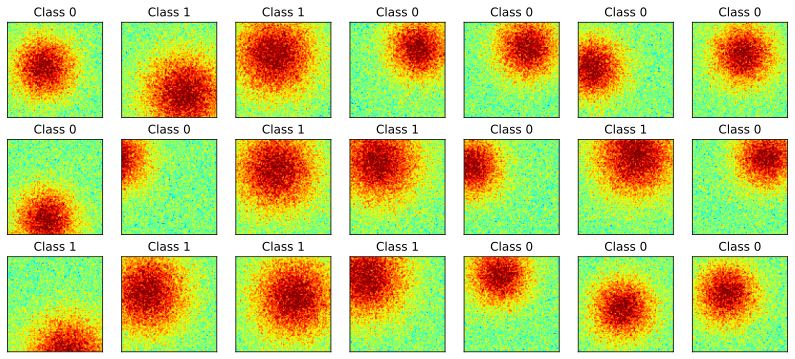

In [13]:
# Visualize some images
fig, axs = plt.subplots(3, 7, figsize=(14, 6))

for i, ax in enumerate(axs.flatten()):
    whichpic = np.random.randint(2 * nPerClass)
    G = np.squeeze(images[whichpic, :, :])
    ax.imshow(G.cpu(), vmin=-1, vmax=1, cmap='jet')
    ax.set_title('Class %s' %int(labels[whichpic].item()))
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [17]:
# Create train/test groups using Dataloaders
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, train_size=0.8)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True, generator=torch.Generator(device=device))
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0], generator=torch.Generator(device=device))

# Print the shapes of the datasets
print("Train Data Shape:", train_data.tensors[0].shape, "\nTrain Labels Shape:", train_data.tensors[1].shape, "\n============================================")
print("Test Data Shape:", test_data.tensors[0].shape, "\nTest Labels Shape:", test_data.tensors[1].shape)

Train Data Shape: torch.Size([1600, 1, 91, 91]) 
Train Labels Shape: torch.Size([1600, 1]) 
Test Data Shape: torch.Size([400, 1, 91, 91]) 
Test Labels Shape: torch.Size([400, 1])
